In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import os

In [8]:
train_data_gen = ImageDataGenerator(rescale = 1)

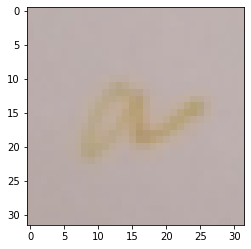

In [9]:
img = load_img('./words/a/01_100.png')
plt.imshow(img)
plt.show()

In [10]:
i = 0
for batch in train_data_gen.flow_from_directory('./words',target_size = (100,100),batch_size = 32):
    image = batch[0].astype('uint8')
    image = np.squeeze(image) 
    i = i+1
    if i > 50:
        break

Found 1573 images belonging to 4 classes.


In [11]:
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(4,activation = 'softmax'))

In [13]:
train_iteraor = train_data_gen.flow_from_directory('./words',batch_size=32,target_size = (100,100))

Found 1573 images belonging to 4 classes.


In [20]:
model.compile(loss ='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(train_iteraor,validation_data=train_iteraor,epochs=8)

Epoch 1/8
50/50 [==============================] - 7s 131ms/step - loss: 21.8745 - accuracy: 0.3363 - val_loss: 1.5597 - val_accuracy: 0.3808
Epoch 2/8
50/50 [==============================] - 6s 128ms/step - loss: 1.1461 - accuracy: 0.5111 - val_loss: 0.8570 - val_accuracy: 0.6612
Epoch 3/8
50/50 [==============================] - 6s 128ms/step - loss: 1.0536 - accuracy: 0.5912 - val_loss: 0.9721 - val_accuracy: 0.6154
Epoch 4/8
50/50 [==============================] - 6s 128ms/step - loss: 1.0069 - accuracy: 0.5919 - val_loss: 1.0828 - val_accuracy: 0.5480
Epoch 5/8
50/50 [==============================] - 6s 128ms/step - loss: 0.8290 - accuracy: 0.6745 - val_loss: 0.6912 - val_accuracy: 0.7279
Epoch 6/8
50/50 [==============================] - 6s 129ms/step - loss: 0.6902 - accuracy: 0.7279 - val_loss: 0.6290 - val_accuracy: 0.7343
Epoch 7/8
50/50 [==============================] - 6s 128ms/step - loss: 0.6058 - accuracy: 0.7597 - val_loss: 0.4588 - val_accuracy: 0.8163
Epoch 8/8
50

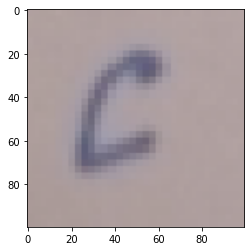

In [48]:
img = load_img('./words/c/19_103.png',target_size=(100,100))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,100,100,3)

In [49]:
class_labels = {'a': 0,'b': 1,'c': 2,'e': 3}

In [65]:
result = model.predict(img)
prob = (max(max(result))*100)

In [66]:
if prob > 75.0 :
    result = np.argmax(result)
    re = [key for key in class_labels][result]
    print(f'there is {round(prob)}% probability that the image is {re}')
    
else:
    print("can not predict accurately")

there is 84% probability that the image is c
